# Word Embeddings: CBOW

In [1]:
# connect to google drive and move to the selected directory
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/My Drive/Stage LIP6/CBOW"
!pwd 
!ls 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Stage LIP6/CBOW
/content/gdrive/My Drive/Stage LIP6/CBOW
'Colab + Google drive ready.ipynb'   data   README.md   Sources.gdoc


In [2]:
#!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from tqdm import trange
import matplotlib.pyplot as plt

import models
import utils

In [46]:
#REQUIRED: ACTIVATE the gpu: (In the menu tabs, "Runtime" => "Change runtime type and select gpu) 

torch.manual_seed(1)
CUDA = torch.cuda.is_available()
if CUDA:
    print("avaible GPUs:",torch.cuda.device_count())
    print("GPU name:",torch.cuda.get_device_name())
print("pytorch version: ",torch.__version__)


pytorch version:  1.5.1+cpu


In [47]:
with open("data/en.txt", "r", encoding="utf8") as f:
    text=f.read()

text='''
hello, how are you? what are you doing ? i'm here
'''

#preprocessing
data,words_to_idx=preprocess_text(text,context_size=2)
idx_to_words = {v: k for k, v in words_to_idx.items()}

#model
model=CBOW(len(words_to_idx),EMBEDDING_SIZE,CONTEXT_SIZE)
if CUDA:
    model = model.cuda()

100%|██████████| 5/5 [00:00<00:00, 20.67it/s]


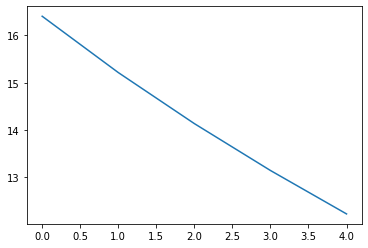

In [48]:
CONTEXT_SIZE=2
EMBEDDING_SIZE=300
EPOCHS=5
LEARNING_RATE = 0.001


def train(model,data,words_to_idx):
    '''
    Train a model 

    Parameters:
        model (nn.module):
        data(list of tuples):  
        words_to_idx() :dict containing a mapping word->index
    Return:
        tensor (Tensor): 
    '''
    loss_func = torch.nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
    losses=[]

    for epoch in trange(EPOCHS):
        total_loss=0
        for context,target in data:
            context_idx=get_idx_by_word(context,words_to_idx)
            target_idx=get_idx_by_word([target],words_to_idx)

            output=model(context_idx)
            loss = loss_func(output, target_idx)

            model.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        losses.append(total_loss)
    
    plt.figure()
    plt.plot(losses)
    plt.show()
train(model,data,words_to_idx)

In [49]:

def check_accuracy(model,data,words_to_idx,idx_to_words):

    """"
    Check accuracy

    Parameters: 
        data(list): list of tuples(context,target) 
        model:
        words_to_idx(dict):dict containing a mapping word->index
        idx_to_words(dict):dict containing a mapping index->word
    Return:
        (String): predicted word
    """

    correct = 0
    for context, target in data:
        prediction = get_prediction(context, model,words_to_idx,idx_to_words)
        if prediction == target:
            correct += 1
    return correct/len(data)

print(check_accuracy(model,data,words_to_idx,idx_to_words))

1.0


In [50]:
print(get_prediction(['HOW' ,'are','what' ,'are'],model,words_to_idx,idx_to_words))

you?
